In [1]:
import sys
import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'./')
# from importlib import reload

In [2]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=1,processes=False,memory_limit='25gb',threads_per_worker=14,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)

In [3]:
from skylens import *
from survey_utils import *

In [4]:
#only for python3
import importlib
reload=importlib.reload

In [5]:
zs=lsst_source_tomo_bins()
corr_ll=('shear', 'shear')

ns0:  27.0


In [6]:
wigner_files={}
wigner_files[0]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr'
wigner_files[2]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'



# Power Spectrum covariance

In [7]:
#setup parameters
lmax_cl=200
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=20
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=True
tidal_SSV_cov=False
Tri_cov=True

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)

##  Test with 1 redshift bin

In [8]:
store_win=True
window_lmax=200

In [9]:
use_window=True
do_cov=True

In [10]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=1024)

Win gen: step size 2137
Window done


./cov_utils.py:54: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th
./angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
  self.cl_f=(l+0.5)**2/(l*(l+1.)) # cl correction from Kilbinger+ 2017


cl dict done dict_keys([('galaxy', 'galaxy')])


/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/healpy/sphtfunc.py:401: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [11]:
use_binned_l=False

In [12]:
a={'a':1,'b':2}

In [13]:
kk=list(a.keys())
ii=len(kk)

In [14]:
[(kk[i],kk[j]) for i in np.arange(ii) for j in np.arange(i,ii)]

[('a', 'a'), ('a', 'b'), ('b', 'b')]

In [15]:
import skylens
reload(skylens)
from skylens import *

In [16]:
store_win=True

In [17]:
#use all ell
kappa0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax
                                       )

Win gen: step size 199
wigner_files: {0: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr', 2: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'}
wigner done dict_keys([0, 2])
setting windows <Client: 'inproc://192.168.86.48/50174/1' processes=1 threads=14, memory=25.00 GB>
got window cls, now to coupling matrices.
done coupling submatrix  0 2.540329933166504 1.7447459697723389 0.795583963394165
Window done


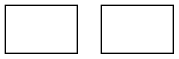

In [18]:
dask.visualize(kappa0.Win.Win)

In [19]:
%time cl0G=kappa0.cl_tomo() 

cl dict done dict_keys([('shear', 'shear')])
CPU times: user 17.4 s, sys: 3.86 s, total: 21.2 s
Wall time: 14.8 s


In [20]:
kappa0.l.shape

(198,)

In [21]:
%time cl0=cl0G['stack'].compute()

CPU times: user 111 ms, sys: 348 ms, total: 459 ms
Wall time: 34.9 ms


In [22]:
do_xi=True
bin_xi=True
do_cov=False
bin_cl=True
th_min=2.5/60
th_max=250./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins*40)
thb=np.sqrt(th_bins[1:]*th_bins[:-1])

In [23]:
# import wigner_transform 
# reload(wigner_transform)
# from wigner_transform import *

import binning
reload(binning)
from binning import *

In [24]:
#Hankel Transform setup
HT_kwargs={'l':l0,'theta':th,'m1_m2':[(2,2),(2,-2)]}
WT=wigner_transform(**HT_kwargs)

In [25]:
import skylens
reload(skylens)
from skylens import *

In [26]:
use_binned_theta=True

In [27]:
kappa_xi0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax,
                                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                      use_binned_l=False,use_binned_theta=False
                                       )

./cov_utils.py:54: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th


Win gen: step size 199
wigner_files: {0: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr', 2: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'}
wigner done dict_keys([0, 2])
setting windows <Client: 'inproc://192.168.86.48/50174/1' processes=1 threads=14, memory=25.00 GB>
got window cls, now to coupling matrices.
done coupling submatrix  0 2.825939893722534 2.2820489406585693 0.5438909530639648
Window done


In [ ]:
%time xiHG0=kappa_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()

In [28]:
kappa_xib=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax,
                                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                      use_binned_l=use_binned_l,use_binned_theta=use_binned_theta
                                       )

not setting corr_indxs False True
Win gen: step size 199
Window done
not setting corr_indxs False True
Win gen: step size 20
Window done
not setting corr_indxs False True
Win gen: step size 199
Window done
cl dict done dict_keys([('shear', 'shear')])
cl dict done dict_keys([('shear', 'shear')])
cl dict done dict_keys([('shear', 'shear')])
cl dict done dict_keys([('shear', 'shear')])
not setting corr_indxs False True


KeyError: (2, 2)

In [ ]:
%time xiHG_b=kappa_xib.xi_tomo()

In [ ]:
%time xiH_b=xiHG_b['stack'].compute()

In [ ]:
%time xiHG0=kappa_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()

In [ ]:
xiH0['xi']

In [ ]:
xiH_b['xi']